# An example notebook to demonstrate image classification using CNNs 

This notebook demonstrate how image classification acutally works using Convolution Neural Networks. We will use **keras** along with the **tensorflow** backend. 

### Dataset

The dataset can be found on Kaggle: https://www.kaggle.com/alxmamaev/flowers-recognition. It contains 4316 images of 5 different categories of flowers, **daisy, dandelion, rose, sunflower, and tulip**. These photos need to be preprocessed as they are of varying dimensions and will not fit into the neural network as is. 

### Preparing, Importing, and Exploring the Data

Download the data from Kaggle. The data is not split into train, validation and test sets beforehand. so the first challenge is to split the data. We cannot test performance on the training data because it was already seen by the model so this does not give a good indication of how the model would perform on unseen data. Thus we use a test set. However, we can fit to the test set while building the model, so we add in the validation set to check performance when training, and then use the test set afterwards to check performance on completely new data.

Using the os package, or manually(since it is a small dataset) ensure that you have the following directory heirarchy:

```
- dataset

-- test
--- daisy
--- dandelion
--- rose
--- sunflower
--- tulip

-- train
--- daisy
--- dandelion
--- rose
--- sunflower
--- tulip

-- valid
--- daisy
--- dandelion
--- rose
--- sunflower
--- tulip

```

Next, we ImageDataGenerator to explore the data and create a baseline model for comparison. The images are later rescaled between 0 and 1 because neural networks prefer to work with this scale. We use a batch size of 32 since it is common to use a power of 2 and there are enough images for this to be feasible.

In [ ]:
# use if your dataset is uploaded in your google drive

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
!unzip -qq dataset.zip

replace dataset/train/sunflower/7586498522_4dcab1c8d2_m.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
train_path = 'dataset/train'
valid_path = 'dataset/valid'
test_path = 'dataset/test'

### Using image data generator

In [ ]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, 
                                                                   target_size=(224, 224), 
                                                                   classes=['daisy','dandelion', 'rose', 'sunflower', 'tulip'], 
                                                                   batch_size=32)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, 
                                                        target_size=(224, 224), 
                                                        classes=['daisy','dandelion', 'rose', 'sunflower', 'tulip'], 
                                                        batch_size=32)

test_batches = ImageDataGenerator().flow_from_directory(test_path, 
                                                        target_size=(224, 224), 
                                                        classes=['daisy','dandelion', 'rose', 'sunflower', 'tulip'], 
                                                        batch_size=32)

Found 4188 images belonging to 5 classes.
Found 64 images belonging to 5 classes.
Found 64 images belonging to 5 classes.


### Going through the data

Let's see what classes of objects do we have. 

In [ ]:
# classes assigned by keras

test_batches.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

To view one batch of training data we can get a batch and look at the shape. There are 32 images, of dimensions 224 x 224 and 3 channels as expected.

In [ ]:
imgs, labels = next(train_batches)

imgs.shape

(32, 224, 224, 3)

In [ ]:
imgs[0]

array([[[223., 230., 246.],
        [224., 232., 245.],
        [226., 234., 247.],
        ...,
        [ 25.,  36.,  20.],
        [ 24.,  36.,  22.],
        [ 27.,  41.,  28.]],

       [[221., 228., 244.],
        [223., 231., 244.],
        [225., 233., 246.],
        ...,
        [ 25.,  36.,  19.],
        [ 24.,  36.,  22.],
        [ 26.,  40.,  27.]],

       [[221., 228., 244.],
        [223., 231., 244.],
        [224., 232., 245.],
        ...,
        [ 26.,  37.,  20.],
        [ 25.,  36.,  20.],
        [ 25.,  39.,  26.]],

       ...,

       [[ 59.,  74.,  51.],
        [ 56.,  76.,  49.],
        [ 52.,  75.,  47.],
        ...,
        [ 13.,  25.,   1.],
        [ 13.,  25.,   1.],
        [ 12.,  24.,   0.]],

       [[ 62.,  77.,  54.],
        [ 60.,  80.,  53.],
        [ 55.,  78.,  50.],
        ...,
        [ 15.,  27.,   3.],
        [ 15.,  27.,   3.],
        [ 14.,  26.,   2.]],

       [[ 43.,  61.,  37.],
        [ 43.,  63.,  36.],
        [ 40.,  

The labels for each image have been **one-hot encoded**. Since we have 32 images we have 32 labels and each label has 5 elements corresponding to each possible category.

In [ ]:
labels.shape

(32, 5)

In [ ]:
labels

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

### Visualizing data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import keras
from keras.preprocessing.image import ImageDataGenerator

# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


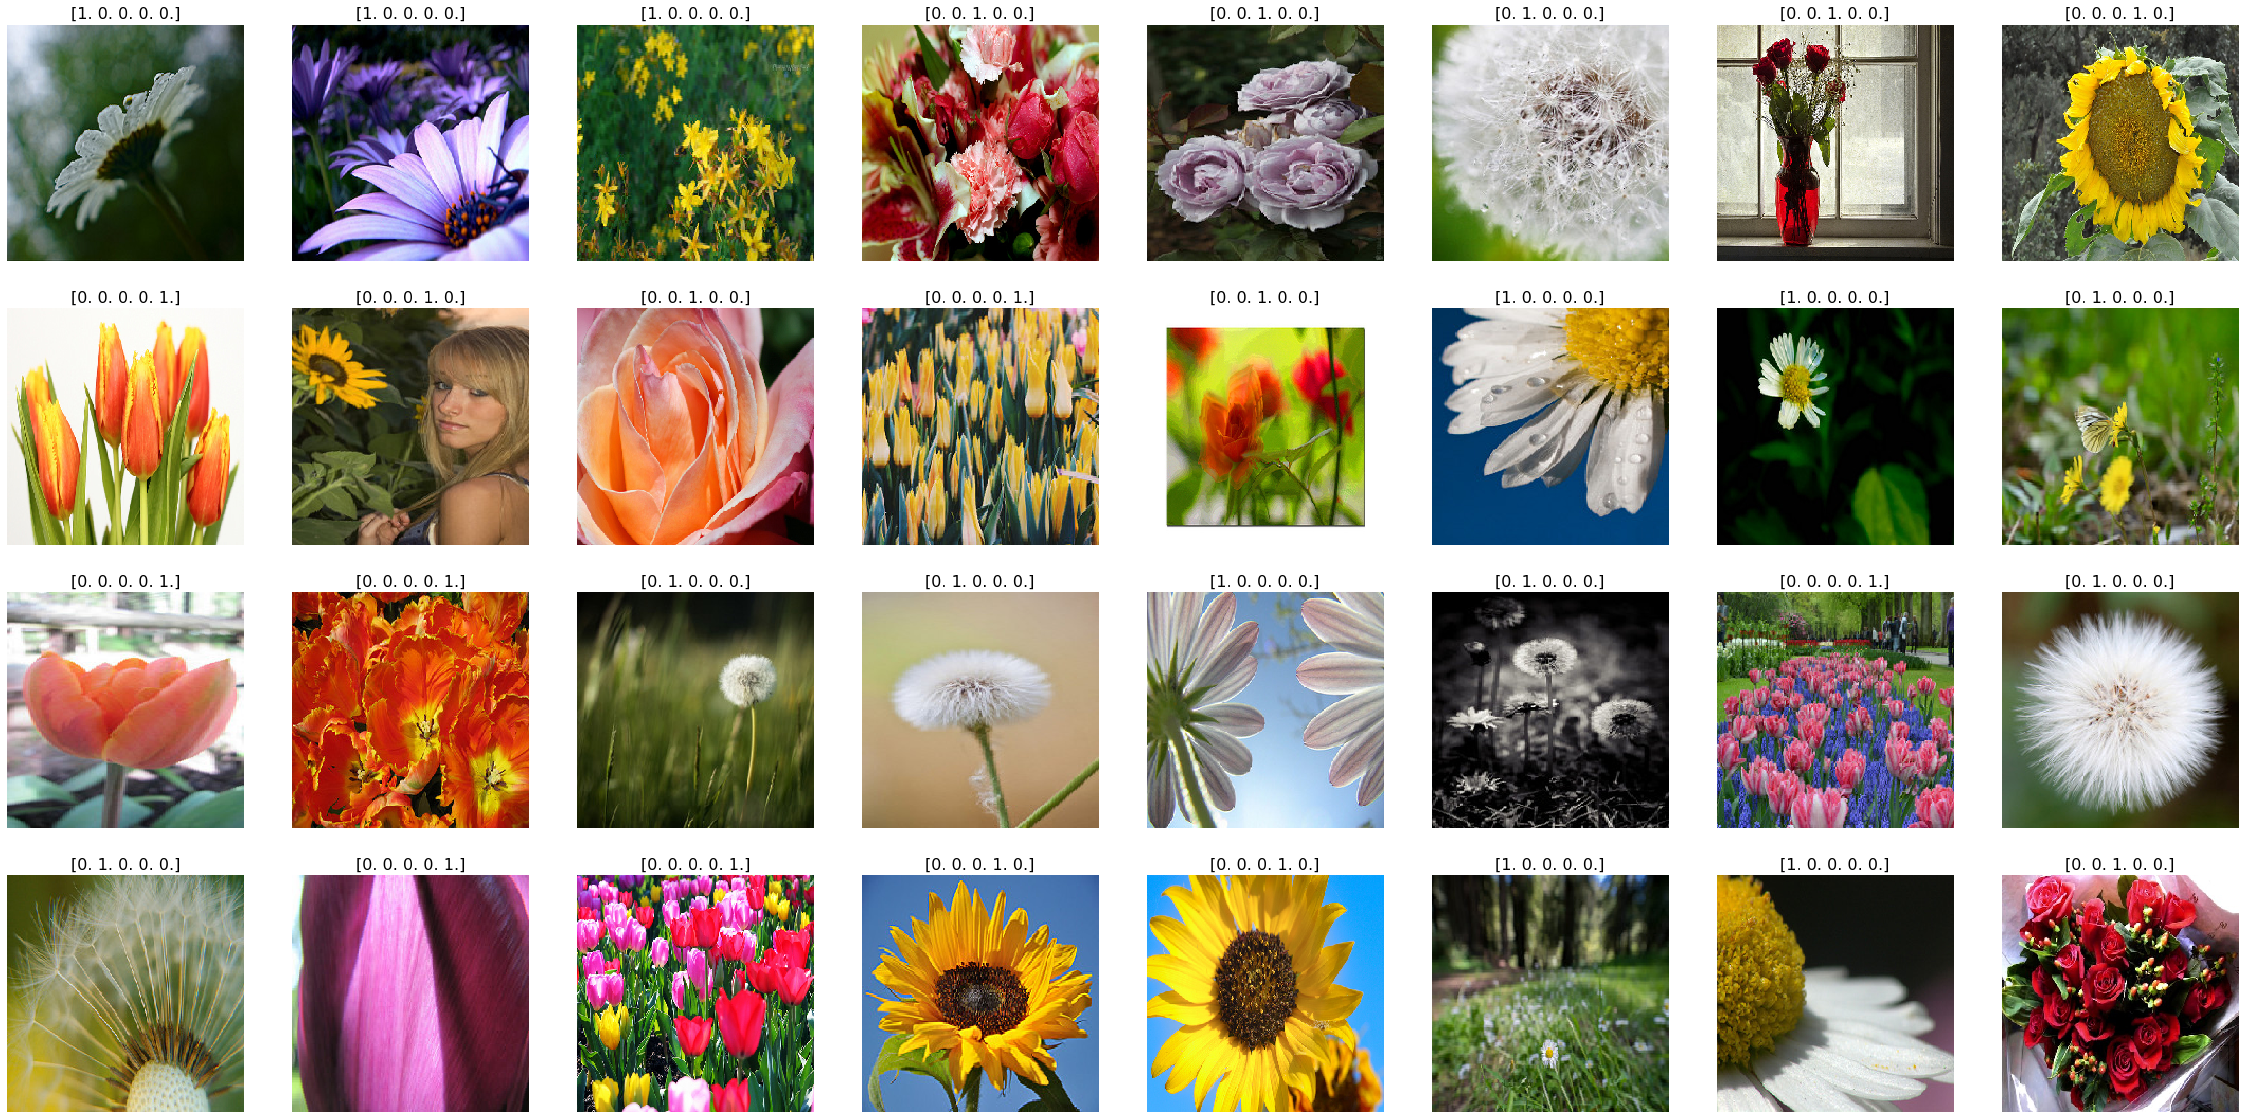

In [ ]:
#['daisy','dandelion', 'rose', 'sunflower', 'tulip']

plots(imgs, figsize=(40,20), rows = 4, titles=labels)

### Creating the model

In [ ]:
# Importing all the requirements

import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.layers.core import Dense, Flatten, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization

from keras.preprocessing import image
from keras.models import Model, load_model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# generates batches of normalized data.

train_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(train_path, 
                                                                   target_size=(224, 224), 
                                                                   classes=['daisy','dandelion', 'rose', 'sunflower', 'tulip'], 
                                                                   batch_size=32)
valid_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(valid_path, 
                                                        target_size=(224, 224), 
                                                        classes=['daisy','dandelion', 'rose', 'sunflower', 'tulip'], 
                                                        batch_size=32)

test_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(test_path, 
                                                        target_size=(224, 224), 
                                                        classes=['daisy','dandelion', 'rose', 'sunflower', 'tulip'], 
                                                        batch_size=32)

Found 4188 images belonging to 5 classes.
Found 64 images belonging to 5 classes.
Found 64 images belonging to 5 classes.


We use **convolutional layers** because they are spatially invariant and great for images. This means that no matter where an element appears in an image it can be detected. This is because conv layers use filters which slide over the image/volumes to produce activation maps.

![alt text](https://cdn-images-1.medium.com/max/1600/1*ZCjPUFrB6eHPRi4eyP6aaA.gif)

[The convolution operation](https://hackernoon.com/visualizing-parts-of-convolutional-neural-networks-using-keras-and-cats-5cc01b214e59)


The **max pooling layers** generally come after the convolutional layers. They shrink the size of the volume by taking the max value within the filter and hence reduce computation costs as we move through the network.

![Max Pooling](https://cdn-images-1.medium.com/max/1600/1*Feiexqhmvh9xMGVVJweXhg.gif)

[Max Pooling](https://hackernoon.com/visualizing-parts-of-convolutional-neural-networks-using-keras-and-cats-5cc01b214e59)


**ReLU's** or Rectified Linear Units are used as the activation function because they help reduce **vanishing gradients** which are an issue with **sigmoid** and **TanH activation** layers. Vanishing gradients are a problem because they reduce the likelihood that a signal will propagate to the input layer and adjust those weights. Hence the earlier layers will not learn. 

![alt text](https://cdn-images-1.medium.com/max/1600/1*rIiBaH5IMVPaE5BM-n7VZw.png)

[Activation Functions](https://hackernoon.com/visualizing-parts-of-convolutional-neural-networks-using-keras-and-cats-5cc01b214e59)


The last layer has a softmax activation with 5 units to account for the 5 classes of the dataset. We will get a probability for each of the classes.

We use the Adam optimizer because it adjusts the learning rate separately per layer and can be used with weight decay so that when we get close to convergence the learning can be reduced so we can thus get better results. Categorical crossentropy is chosen since this is a multiclass classification problem.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

We use the `fit_generator` here because we are getting the data from an `ImageDataGenerator`. These correspond to generators in python and can produce batches into infinity. 

In [ ]:
history = model.fit(
      train_batches,
      steps_per_epoch=81,
      epochs=30,
      validation_data=valid_batches,
      validation_steps=40,
      verbose = 1)

Epoch 1/30
81/81 [==============================] - 16s 196ms/step - loss: 1.3759 - accuracy: 0.3980 - val_loss: 1.2567 - val_accuracy: 0.4688
Epoch 2/30
81/81 [==============================] - 13s 161ms/step - loss: 1.1169 - accuracy: 0.5467 - val_loss: 0.9723 - val_accuracy: 0.6250
Epoch 3/30
81/81 [==============================] - 13s 162ms/step - loss: 1.0080 - accuracy: 0.6019 - val_loss: 1.0355 - val_accuracy: 0.5781
Epoch 4/30
81/81 [==============================] - 13s 164ms/step - loss: 0.9333 - accuracy: 0.6474 - val_loss: 0.7093 - val_accuracy: 0.6250
Epoch 5/30
81/81 [==============================] - 13s 161ms/step - loss: 0.9012 - accuracy: 0.6424 - val_loss: 0.9391 - val_accuracy: 0.7500
Epoch 6/30
81/81 [==============================] - 13s 161ms/step - loss: 0.8074 - accuracy: 0.7014 - val_loss: 0.8561 - val_accuracy: 0.7500
Epoch 7/30
81/81 [==============================] - 13s 161ms/step - loss: 0.7669 - accuracy: 0.7105 - val_loss: 0.8041 - val_accuracy: 0.6719

In [ ]:
# Uncomment the below line if you want to save the model

# model.save('flowers-baseline.h5')

In [ ]:
def plot_curves():

  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Training acc')
  plt.plot(epochs, val_acc, 'b', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

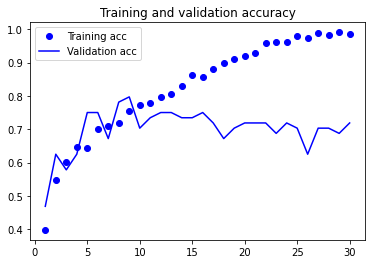

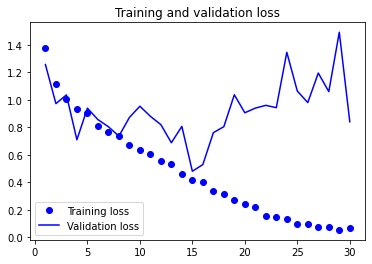

In [ ]:
plot_curves()

### Model with Data Augmentation and Dropout

We add in data augmentation here and dropout to compare performance. Data augmentation and dropout reduces the overfitting we saw in our previous model. Parameters for augmentation are put in the arguments for the ImageDataGenerator function. Dropout is added in as a layer in the model.

In [ ]:
train_batches = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.15,
                                   zoom_range=0.1,
                                   channel_shift_range=10.,
                                   horizontal_flip=True, 
                                   fill_mode='nearest').flow_from_directory(train_path, 
                                                                   target_size=(224, 224), 
                                                                   classes=['daisy','dandelion', 'rose', 'sunflower', 'tulip'], 
                                                                   batch_size=32)
valid_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(valid_path, 
                                                        target_size=(224, 224), 
                                                        classes=['daisy','dandelion', 'rose', 'sunflower', 'tulip'], 
                                                        batch_size=32)

test_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(test_path, 
                                                        target_size=(224, 224), 
                                                        classes=['daisy','dandelion', 'rose', 'sunflower', 'tulip'], 
                                                        batch_size=32)

Found 4188 images belonging to 5 classes.
Found 64 images belonging to 5 classes.
Found 64 images belonging to 5 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(rate = 1-0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit_generator(
      train_batches,
      steps_per_epoch=81,
      epochs=30,
      validation_data=valid_batches,
      validation_steps=40,
      verbose = 1)

Epoch 1/30
81/81 [==============================] - 38s 474ms/step - loss: 1.2115 - accuracy: 0.4768 - val_loss: 1.0747 - val_accuracy: 0.5312
Epoch 2/30
81/81 [==============================] - 36s 444ms/step - loss: 1.1019 - accuracy: 0.5394 - val_loss: 1.0664 - val_accuracy: 0.5625
Epoch 3/30
81/81 [==============================] - 36s 440ms/step - loss: 1.0577 - accuracy: 0.5710 - val_loss: 1.1207 - val_accuracy: 0.6562
Epoch 4/30
81/81 [==============================] - 35s 438ms/step - loss: 1.0407 - accuracy: 0.5948 - val_loss: 0.8894 - val_accuracy: 0.6562
Epoch 5/30
81/81 [==============================] - 36s 440ms/step - loss: 0.9341 - accuracy: 0.6312 - val_loss: 0.9250 - val_accuracy: 0.6250
Epoch 6/30
81/81 [==============================] - 35s 438ms/step - loss: 0.9126 - accuracy: 0.6426 - val_loss: 0.8831 - val_accuracy: 0.7812
Epoch 7/30
81/81 [==============================] - 36s 439ms/step - loss: 0.9133 - accuracy: 0.6458 - val_loss: 1.1714 - val_accuracy: 0.7812

In [ ]:
# uncomment the line if you want to save the model

# model.save('flowers-augmentation-and-dropout.h5')

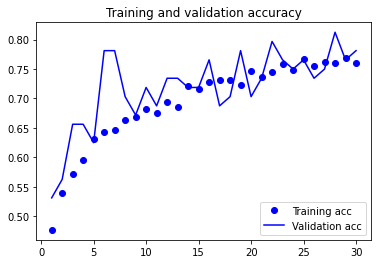

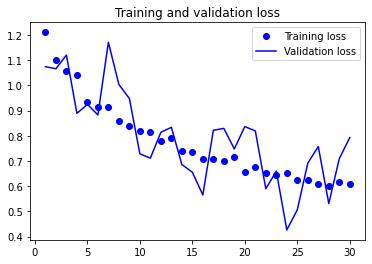

In [ ]:
plot_curves()

### VGG16. Feature Extraction and Fine-Tuning

Now we try feature extraction with VGG16.  This is essentially taking off the top of the model and replacing it with our own layers which are randomly initialized and trained. We have to freeze the other layers to keep the weights. Otherwise, the weights would be destroyed. These models are pre-trained on ImageNet. The reason this works so well is that the features learned at the earlier layers in the convnet are more general (like horizontal or vertical lines) and become more specific (like faces or whole flowers in our example) as we go further into the network. Most of the earlier features are effective with other datasets. It is more effective when the data is similar to the data the network was originally trained on. ImageNet does have flower data so this should work reasonably well.


![vgg net](https://www.researchgate.net/profile/Max_Ferguson/publication/322512435/figure/fig3/AS:697390994567179@1543282378794/Fig-A1-The-standard-VGG-16-network-architecture-as-proposed-in-32-Note-that-only.png)

Source: https://www.researchgate.net/figure/Fig-A1-The-standard-VGG-16-network-architecture-as-proposed-in-32-Note-that-only_fig3_322512435

In [ ]:
vgg16_model = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 41s 0us/step


In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# Create a new model without the last layer and freeze the other layers

model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)
    layer.trainable = False

In [ ]:
# add the new classifier

model.add(Dense(5, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

### Training the Feature Extractor (1 - 10 epochs)

In [ ]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
keras.callbacks.ModelCheckpoint
keras.callbacks.EarlyStopping
keras.callbacks.LearningRateScheduler
keras.callbacks.ReduceLROnPlateau
keras.callbacks.CSVLogger

keras.callbacks.callbacks.CSVLogger

Callbacks in Keras can be used to control the training process a bit more. Here we are reducing the learning rate if the validation loss does not drop after 10 epochs (`patience =10`). We also stop early more cleanly than cancelling the running cell after one epoch (`patience = 1`). We checkpoint (save) the model for the best validation loss. Adding the parameter `verbose=1` will log when the functions are being called.

In [65]:
# Run #1 without unfreezing

callbacks_list = [
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=10,
    ),
    keras.callbacks.EarlyStopping(
        monitor='acc',
        patience=1,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='my_model.h5',
        monitor='val_loss',
        save_best_only=True,
    )
]


# use this to grab batches from the image data generator
# tell model.fit about the validation data.

history = model.fit_generator(train_batches, 
                    steps_per_epoch=81, 
                    callbacks=callbacks_list,
                    validation_data=valid_batches, 
                    validation_steps=40, 
                    epochs=10, 
                    verbose = 1)

Epoch 1/10
81/81 [==============================] - 44s 544ms/step - loss: 0.6836 - accuracy: 0.7693 - val_loss: 0.7232 - val_accuracy: 0.7031


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/10
81/81 [==============================] - 40s 490ms/step - loss: 0.7162 - accuracy: 0.7539 - val_loss: 0.7155 - val_accuracy: 0.7031
Epoch 3/10
81/81 [==============================] - 40s 492ms/step - loss: 0.7065 - accuracy: 0.7519 - val_loss: 0.8789 - val_accuracy: 0.7031
Epoch 4/10
81/81 [==============================] - 40s 491ms/step - loss: 0.6794 - accuracy: 0.7728 - val_loss: 0.8293 - val_accuracy: 0.7031
Epoch 5/10
81/81 [==============================] - 40s 493ms/step - loss: 0.7201 - accuracy: 0.7446 - val_loss: 0.7933 - val_accuracy: 0.7031
Epoch 6/10
81/81 [==============================] - 40s 489ms/step - loss: 0.7137 - accuracy: 0.7450 - val_loss: 0.8710 - val_accuracy: 0.7031
Epoch 7/10
81/81 [==============================] - 40s 491ms/step - loss: 0.6814 - accuracy: 0.7770 - val_loss: 0.8542 - val_accuracy: 0.7031
Epoch 8/10
81/81 [==============================] - 40s 488ms/step - loss: 0.6991 - accuracy: 0.7570 - val_loss: 0.9536 - val_accuracy: 0.7031

In [66]:
# Run #2 with freezing and 30 epochs
 

callbacks_list = [
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=7,
        verbose = 1
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        mode = 'min',
        restore_best_weights = True,
        verbose = 1
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='feature-extraction.h5',
        monitor='val_loss',
        save_best_only=True,
    )
]


# use this to grab batches from the image data generator
# tell model.fit about the validation data.

history = model.fit_generator(train_batches, 
                    steps_per_epoch=81, 
                    callbacks=callbacks_list,
                    validation_data=valid_batches, 
                    validation_steps=40, 
                    epochs=30, 
                    verbose = 2)

Epoch 1/30
 - 44s - loss: 0.7032 - accuracy: 0.7566 - val_loss: 0.7738 - val_accuracy: 0.7031
Epoch 2/30
 - 39s - loss: 0.7169 - accuracy: 0.7566 - val_loss: 0.6057 - val_accuracy: 0.7031
Epoch 3/30
 - 40s - loss: 0.6777 - accuracy: 0.7689 - val_loss: 0.8264 - val_accuracy: 0.7031
Epoch 4/30
 - 39s - loss: 0.7159 - accuracy: 0.7550 - val_loss: 0.8146 - val_accuracy: 0.7031
Epoch 5/30
 - 40s - loss: 0.6760 - accuracy: 0.7689 - val_loss: 0.8108 - val_accuracy: 0.7031
Epoch 6/30
 - 40s - loss: 0.7018 - accuracy: 0.7573 - val_loss: 0.9310 - val_accuracy: 0.7031
Epoch 7/30
 - 40s - loss: 0.6817 - accuracy: 0.7639 - val_loss: 0.7835 - val_accuracy: 0.7031
Epoch 8/30
 - 39s - loss: 0.7081 - accuracy: 0.7570 - val_loss: 0.8182 - val_accuracy: 0.7031
Epoch 9/30
 - 42s - loss: 0.6911 - accuracy: 0.7701 - val_loss: 0.9578 - val_accuracy: 0.7031

Epoch 00009: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.
Epoch 10/30
 - 40s - loss: 0.7174 - accuracy: 0.7554 - val_loss: 0.7970 -

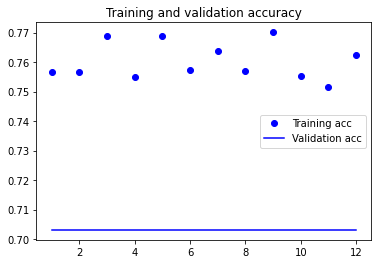

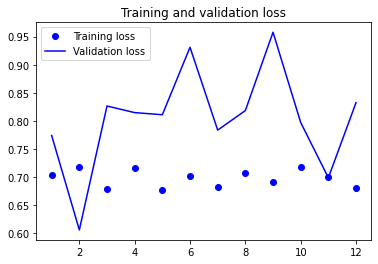

In [67]:
plot_curves()

### Feature extraction with a new flatten layer and 2 dense layers at the end 

We get slightly better performance here with a max validation loss of 0.83 from 0.79 in the previous 2 models. There are more layers here to adjust.

In [68]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

conv_base.summary()

58892288/58889256 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [69]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [70]:
print('This is the number of trainable weights '
         'before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights '
          'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [71]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=2e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [72]:
callbacks_list = [
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=7,
        verbose = 1
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        mode = 'min',
        restore_best_weights = True,
        verbose = 1
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='feature-extraction-rmsprop-replaced-top.h5',
        monitor='val_loss',
        save_best_only=True,
    )
]


# use this to grab batches from the image data generator
# tell model.fit about the validation data.
history = model.fit_generator(train_batches, 
                    steps_per_epoch=81, 
                    callbacks=callbacks_list,
                    validation_data=valid_batches, 
                    validation_steps=40, 
                    epochs=30, 
                    verbose = 1)

Epoch 1/30
81/81 [==============================] - 44s 542ms/step - loss: 1.1141 - accuracy: 0.5784 - val_loss: 0.9435 - val_accuracy: 0.6406
Epoch 2/30
81/81 [==============================] - 40s 491ms/step - loss: 0.8191 - accuracy: 0.7168 - val_loss: 0.8321 - val_accuracy: 0.6562
Epoch 3/30
81/81 [==============================] - 40s 491ms/step - loss: 0.6845 - accuracy: 0.7639 - val_loss: 0.7983 - val_accuracy: 0.6406
Epoch 4/30
81/81 [==============================] - 40s 488ms/step - loss: 0.6333 - accuracy: 0.7786 - val_loss: 0.7437 - val_accuracy: 0.7031
Epoch 5/30
81/81 [==============================] - 40s 491ms/step - loss: 0.5902 - accuracy: 0.7998 - val_loss: 0.5770 - val_accuracy: 0.6250
Epoch 6/30
81/81 [==============================] - 40s 493ms/step - loss: 0.5486 - accuracy: 0.8041 - val_loss: 0.5306 - val_accuracy: 0.7656
Epoch 7/30
81/81 [==============================] - 40s 496ms/step - loss: 0.5182 - accuracy: 0.8207 - val_loss: 0.6683 - val_accuracy: 0.7188

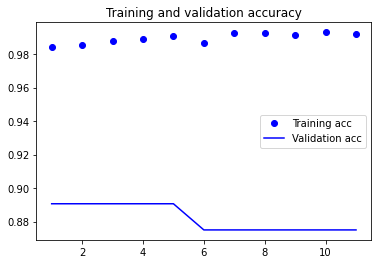

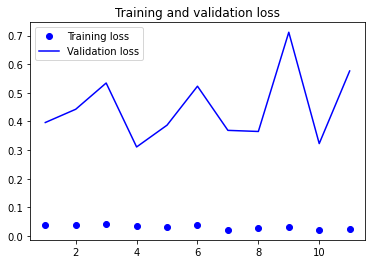

In [97]:
plot_curves()

We continue training from the previous model with lower patience for `ReduceLROnPlateau`. This makes no significant difference.

In [73]:
callbacks_list = [
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=3,
        verbose = 1
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        mode = 'min',
        restore_best_weights = True,
        verbose = 1
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='feature-extraction-rmsprop-replaced-top-lr-lower.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]


# use this to grab batches from the image data generator
# tell model.fit about the validation data.
# steps per epoch size of dataset/batchsize . 2594/32
history = model.fit_generator(train_batches, 
                    steps_per_epoch=81, 
                    callbacks=callbacks_list,
                    validation_data=valid_batches, 
                    validation_steps=40, 
                    epochs=30, 
                    verbose = 1)

Epoch 1/30
81/81 [==============================] - 44s 540ms/step - loss: 0.2925 - accuracy: 0.9062 - val_loss: 0.4392 - val_accuracy: 0.8281

Epoch 00001: val_loss improved from inf to 0.43923, saving model to feature-extraction-rmsprop-replaced-top-lr-lower.h5
Epoch 2/30
81/81 [==============================] - 40s 489ms/step - loss: 0.3097 - accuracy: 0.9019 - val_loss: 0.4890 - val_accuracy: 0.8281

Epoch 00002: val_loss did not improve from 0.43923
Epoch 3/30
81/81 [==============================] - 40s 491ms/step - loss: 0.3016 - accuracy: 0.9022 - val_loss: 0.3104 - val_accuracy: 0.8281

Epoch 00003: val_loss improved from 0.43923 to 0.31038, saving model to feature-extraction-rmsprop-replaced-top-lr-lower.h5
Epoch 4/30
81/81 [==============================] - 40s 488ms/step - loss: 0.3086 - accuracy: 0.9020 - val_loss: 0.5550 - val_accuracy: 0.8281

Epoch 00004: val_loss did not improve from 0.31038
Epoch 5/30
81/81 [==============================] - 39s 487ms/step - loss: 0.3

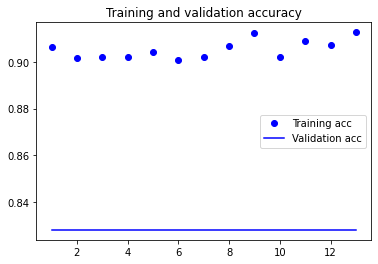

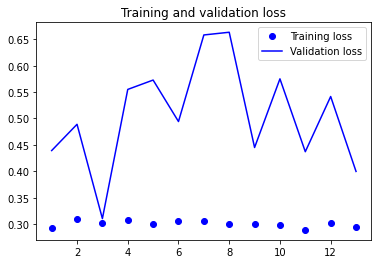

In [74]:
plot_curves()

### Fine Tuning

We continue training the same model as above. We unfreeze the weights in the last block and reduce the learning rate so the pretrained weights are not destroyed. The validation accuracy increases slightly to 0.8608.

In [75]:
# modify the layers

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [76]:
len(model.trainable_weights)

10

In [77]:
model.compile(optimizer=keras.optimizers.RMSprop(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [78]:
callbacks_list = [
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=5,
        verbose = 1
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        mode = 'min',
        restore_best_weights = True,
        verbose = 1
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='fine-tuning.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]

# use this to grab batches from the image data generator
# tell model.fit about the validation data.
history = model.fit_generator(train_batches, 
                    steps_per_epoch=81, 
                    callbacks=callbacks_list,
                    validation_data=valid_batches, 
                    validation_steps=40, 
                    epochs=30, 
                    verbose = 1)

Epoch 1/30
81/81 [==============================] - 45s 554ms/step - loss: 0.3007 - accuracy: 0.8972 - val_loss: 0.3639 - val_accuracy: 0.8281

Epoch 00001: val_loss improved from inf to 0.36390, saving model to fine-tuning.h5
Epoch 2/30
81/81 [==============================] - 41s 501ms/step - loss: 0.2817 - accuracy: 0.9039 - val_loss: 0.4349 - val_accuracy: 0.8125

Epoch 00002: val_loss did not improve from 0.36390
Epoch 3/30
81/81 [==============================] - 40s 499ms/step - loss: 0.2441 - accuracy: 0.9181 - val_loss: 0.2515 - val_accuracy: 0.8438

Epoch 00003: val_loss improved from 0.36390 to 0.25147, saving model to fine-tuning.h5
Epoch 4/30
81/81 [==============================] - 41s 501ms/step - loss: 0.2090 - accuracy: 0.9308 - val_loss: 0.3779 - val_accuracy: 0.7969

Epoch 00004: val_loss did not improve from 0.25147
Epoch 5/30
81/81 [==============================] - 41s 503ms/step - loss: 0.2106 - accuracy: 0.9286 - val_loss: 0.3464 - val_accuracy: 0.8594

Epoch 00

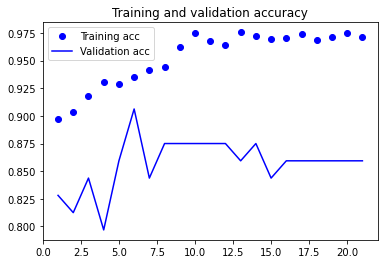

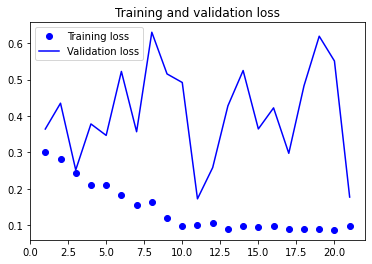

In [79]:
plot_curves()

### Feature Extraction and Fine-Tuning with DenseNet161

Let's try another model. 

In [80]:
from keras.applications import DenseNet169

conv_base = DenseNet169(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

51879936/51877672 [==============================] - 5s 0us/step


In [81]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [82]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet169 (Model)          (None, 7, 7, 1664)        12642880  
_________________________________________________________________
flatten_4 (Flatten)          (None, 81536)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               20873472  
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 1285      
Total params: 33,517,637
Trainable params: 33,359,237
Non-trainable params: 158,400
_________________________________________________________________


In [83]:
print('This is the number of trainable weights '
         'before freezing the conv base:', len(model.trainable_weights))
conv_base.trainable = False
print('This is the number of trainable weights '
          'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 510
This is the number of trainable weights after freezing the conv base: 4


In [84]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [85]:
callbacks_list = [
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=7,
        verbose = 1
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        mode = 'min',
        restore_best_weights = True,
        verbose = 1
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='feature-extraction-densenet.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose = 1
    )
]


# use this to grab batches from the image data generator
# tell model.fit about the validation data.

history = model.fit_generator(train_batches, 
                    steps_per_epoch=81, 
                    callbacks=callbacks_list,
                    validation_data=valid_batches, 
                    validation_steps=40, 
                    epochs=50, 
                    verbose = 1)

Epoch 1/50
81/81 [==============================] - 66s 816ms/step - loss: 3.4528 - accuracy: 0.7454 - val_loss: 2.5091 - val_accuracy: 0.7344

Epoch 00001: val_loss improved from inf to 2.50910, saving model to feature-extraction-densenet.h5
Epoch 2/50
81/81 [==============================] - 52s 639ms/step - loss: 1.0599 - accuracy: 0.8314 - val_loss: 0.7223 - val_accuracy: 0.8750

Epoch 00002: val_loss improved from 2.50910 to 0.72231, saving model to feature-extraction-densenet.h5
Epoch 3/50
81/81 [==============================] - 52s 639ms/step - loss: 0.8127 - accuracy: 0.8377 - val_loss: 1.4668 - val_accuracy: 0.7812

Epoch 00003: val_loss did not improve from 0.72231
Epoch 4/50
81/81 [==============================] - 52s 642ms/step - loss: 0.3909 - accuracy: 0.8972 - val_loss: 1.0936 - val_accuracy: 0.7812

Epoch 00004: val_loss did not improve from 0.72231
Epoch 5/50
81/81 [==============================] - 52s 642ms/step - loss: 0.3161 - accuracy: 0.8974 - val_loss: 0.6945 

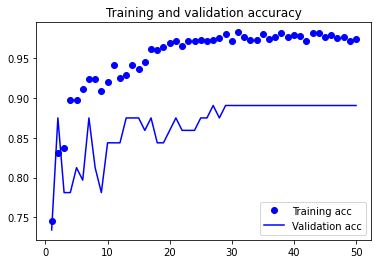

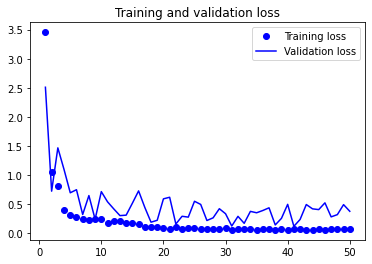

In [86]:
plot_curves()

### Fine Tuning

In [87]:
len(model.trainable_weights)

4

In [88]:
# Restore the model weights
# modify the layers

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name.startswith( 'conv5' ):
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [89]:
len(model.trainable_weights)

198

In [90]:
model.compile(optimizer=Adam(lr=1e-5, decay = 1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [91]:
%%time


callbacks_list = [
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=5,
        verbose = 1
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        mode = 'min',
        restore_best_weights = True,
        verbose = 1
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='fine-tuning-densenet.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )

]


# use this to grab batches from the image data generator
# tell model.fit about the validation data.

history = model.fit_generator(train_batches, 
                    steps_per_epoch=81, 
                    callbacks=callbacks_list,
                    validation_data=valid_batches, 
                    validation_steps=40, 
                    epochs=30, 
                    verbose = 2)

Epoch 1/30
 - 91s - loss: 0.0740 - accuracy: 0.9745 - val_loss: 0.2134 - val_accuracy: 0.8906

Epoch 00001: val_loss improved from inf to 0.21340, saving model to fine-tuning-densenet.h5
Epoch 2/30
 - 59s - loss: 0.0685 - accuracy: 0.9738 - val_loss: 0.2642 - val_accuracy: 0.8906

Epoch 00002: val_loss did not improve from 0.21340
Epoch 3/30
 - 59s - loss: 0.0645 - accuracy: 0.9803 - val_loss: 0.4104 - val_accuracy: 0.8906

Epoch 00003: val_loss did not improve from 0.21340
Epoch 4/30
 - 60s - loss: 0.0607 - accuracy: 0.9807 - val_loss: 0.1858 - val_accuracy: 0.8906

Epoch 00004: val_loss improved from 0.21340 to 0.18581, saving model to fine-tuning-densenet.h5
Epoch 5/30
 - 59s - loss: 0.0521 - accuracy: 0.9830 - val_loss: 0.3017 - val_accuracy: 0.9062

Epoch 00005: val_loss did not improve from 0.18581
Epoch 6/30
 - 59s - loss: 0.0444 - accuracy: 0.9838 - val_loss: 0.2841 - val_accuracy: 0.9062

Epoch 00006: val_loss did not improve from 0.18581
Epoch 7/30
 - 59s - loss: 0.0352 - acc

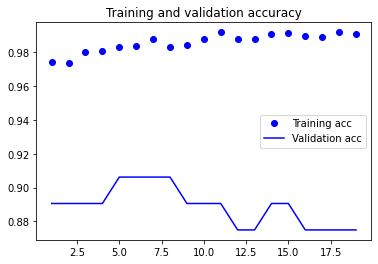

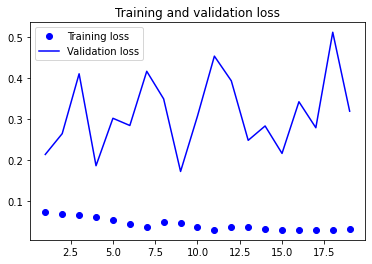

In [92]:
plot_curves()

In [93]:
# adding in weight decay with Adam

epochs = 50
learning_rate = 1e-5
decay_rate = learning_rate / epochs

model.compile(optimizer=Adam(lr=learning_rate, decay = decay_rate), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [94]:
# The error here and is intentional due to early stopping.

callbacks_list = [
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.01,
        patience=5,
        verbose = 1
    ),
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=7,
        mode = 'min',
        restore_best_weights = True,
        verbose = 1
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='fine-tuning-densenet-learning-rate-scheduler.h5',
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )

]


# use this to grab batches from the image data generator
# tell model.fit about the validation data.

history = model.fit_generator(train_batches, 
                    steps_per_epoch=81, 
                    callbacks=callbacks_list,
                    validation_data=valid_batches, 
                    validation_steps=40, 
                    epochs=epochs, 
                    verbose = 1)

Epoch 1/50
81/81 [==============================] - 94s 1s/step - loss: 0.0403 - accuracy: 0.9842 - val_loss: 0.3964 - val_accuracy: 0.8906

Epoch 00001: val_loss improved from inf to 0.39643, saving model to fine-tuning-densenet-learning-rate-scheduler.h5
Epoch 2/50
81/81 [==============================] - 59s 731ms/step - loss: 0.0404 - accuracy: 0.9853 - val_loss: 0.4427 - val_accuracy: 0.8906

Epoch 00002: val_loss did not improve from 0.39643
Epoch 3/50
81/81 [==============================] - 59s 726ms/step - loss: 0.0426 - accuracy: 0.9880 - val_loss: 0.5342 - val_accuracy: 0.8906

Epoch 00003: val_loss did not improve from 0.39643
Epoch 4/50
81/81 [==============================] - 60s 740ms/step - loss: 0.0351 - accuracy: 0.9892 - val_loss: 0.3111 - val_accuracy: 0.8906

Epoch 00004: val_loss improved from 0.39643 to 0.31114, saving model to fine-tuning-densenet-learning-rate-scheduler.h5
Epoch 5/50
81/81 [==============================] - 59s 723ms/step - loss: 0.0311 - accur

### Evalute the model on the Test Set
The best performing model is evaluated on the test set by reloading the saved version.

In [95]:
# restore the model and do some test set evaluation

from keras.models import load_model
new_model = load_model('fine-tuning-densenet-learning-rate-scheduler.h5')

In [96]:
test_loss, test_acc = new_model.evaluate_generator(test_batches, steps=27)
print('test loss:', test_loss)
print('test acc:', test_acc)

test loss: 0.9941776394844055
test acc: 0.9189814925193787


# Conclusion

In this notebook, we imported, visualized and preprocessed data, built a few models and iteratively increased their sophistication and power via feature extraction and fine tuning pre-trained models. This is a general approach that can be applied to other computer vision datasets.

The best model was a fine-tuned DenseNet161 model with 91% test set accuracy and 90% validation set accuracy. Thus the null was rejected as the dataset performed worse than the precedent. 

# References

* Chollet, Francois. "Deep Learning with Python." (2017).

* Chollet, François. "Keras." (2015), https://keras.io.

* Deep Lizard. "Keras - Python Deep Learning Neural Network API." YouTube, Mar. 2019, https://www.youtube.com/playlist?list=PLZbbT5o_s2xrwRnXk_yCPtnqqo4_u2YGL.

* Deng, Jia, et al. "Imagenet: A large-scale hierarchical image database." (2009): 248-255.

* Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. " O'Reilly Media, Inc.", 2017.

* Ng, Andrew. "Convolutional Neural Networks." Coursera, Mar. 2019, https://www.coursera.org/learn/convolutional-neural-networks/home/welcome.

* Simonyan, Karen, and Andrew Zisserman. "Very deep convolutional networks for large-scale image recognition." arXiv preprint arXiv:1409.1556 (2014).